# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Data Visualisation

In [1]:
#import the libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sb
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


In [2]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [4]:
#Check the datatypes of all the columns of the dataframe
inp0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [5]:
#Check the number of null values in the columns
inp0.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [6]:
#Drop the rows having null values in the Rating field
inp1 = inp0[~inp0.Rating.isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [8]:
#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
#Drop the row having shifted values
inp1[inp1['Android Ver'].isnull() & (inp1['Rating'] == 19.0)]
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1['Rating'] == 19.0))]
#Check the nulls againin Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [11]:
#Check the most common value in the Android version column
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [12]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [13]:
#Check the nulls in the Android version column again to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [15]:
#Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [16]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver'].mode()[0]
inp1['Current Ver']= inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [17]:
#Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [18]:
#Check the null values again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Handling Incorrect Data Types 

In [19]:
#Check the datatypes of all the columns 
inp1.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
#Analyse the Price column to check the issue
# Check the value_counts for Price column
inp1.Price.value_counts()


0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [21]:
#Write the function to make the changes
inp1.Price = inp1.Price.apply(lambda x : 0 if x== '0' else float(x[1:]))


In [22]:
inp1.Price.dtype

dtype('float64')

In [23]:
#Verify the dtype of Price once again
inp1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [24]:
#Average price of all apps having the Android version as "4.1 and up" 
price = inp1[inp1['Android Ver'] == "4.1 and up"]
price['Price'].mean()

0.819160601649685

In [25]:
#Analyse the Reviews column
inp1['Reviews'].value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [26]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32")


#Check the quantitative spread of this dataframe

inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [27]:
#Analyse the Installs Column
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [28]:
#Replace the '+' symbol in Installs column 
def clean_Install(val):
    return int(val.replace(',','').replace('+',''))

In [29]:
#Check Install column values again
inp1.Installs = inp1.Installs.apply(clean_Install)

In [30]:
inp1.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [31]:
#Cleanning the Installs Column and finding the approximate number of apps at the 50th percentile.
#np.percentile(inp1.Installs,50)
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [32]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [33]:
#Perform the sanity checks on the Rating column
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Rating is between 1 and 5 for all the apps.

In [34]:
#Perform the sanity checks on the Reviews column
inp1[inp1.Reviews > inp1.Installs].shape

(7, 13)

In [35]:
inp1[inp1.Reviews > inp1.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [36]:
#So drop these rows
inp1 = inp1[~(inp1.Reviews > inp1.Installs)]

In [37]:
#To do cross check
inp1[inp1.Reviews > inp1.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [38]:
#perform the sanity checks on prices of free apps 
inp1[(inp1.Type == 'Free') & (inp1.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no records of Free App whose price is greater than 0. 

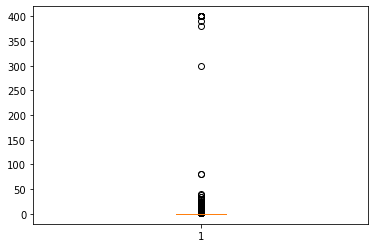

In [39]:
#Create a box plot for the price column
#boxplot = inp1.boxplot(column=['Price'])  
plt.boxplot(inp1.Price)
plt.show()

In [40]:
inp1.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [41]:
#Check the apps with price more than 200
inp1[inp1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [42]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]


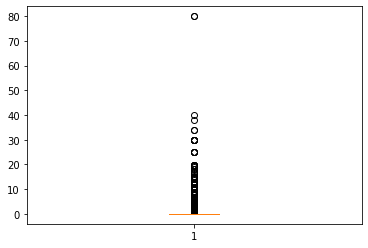

In [43]:
#Create a box plot for paid apps
plt.boxplot(inp1.Price)
plt.show()


In [44]:
#Check the apps with price more than 30
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [45]:
#Clean the Price column again
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(9338, 13)

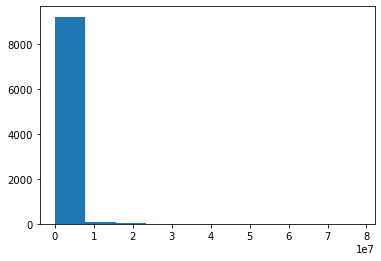

In [46]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()

Most of the values are in the first bin itself.

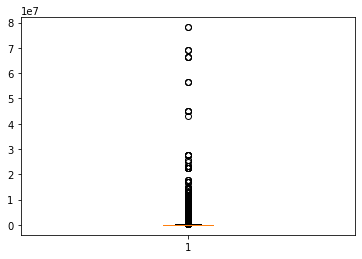

In [47]:
#Create a boxplot of the Reviews column

plt.boxplot(inp1.Reviews)
plt.show()

This revealed that lots of pre-installed and superstar apps are present in the data. These apps won’t be useful for our analysis since they already have skewed statistics (an extremely high number of installs and reviews),
which is not common for a majority of the rest of the apps. 

In [48]:
#Check records with 1 million reviews
inp1[inp1.Reviews > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [49]:
#Drop the above records

inp1 = inp1[inp1.Reviews <= 1000000]

Hence, we took a qualifier of 1 million reviews and removed all the apps having more reviews.

In [50]:
inp1.shape

(8634, 13)

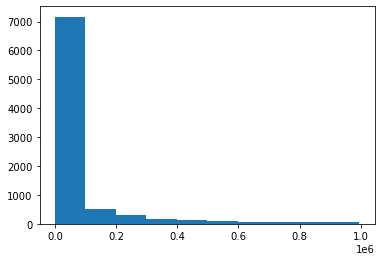

In [51]:
#Histogram plot to check the peaks again
plt.hist(inp1.Reviews)
plt.show()


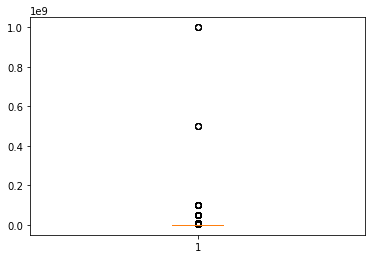

In [52]:
#Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp1.Installs)
plt.show()


In [53]:
inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [54]:
#CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1[inp1.Installs > 100000000]
inp1 = inp1[inp1.Installs <= 100000000]

In [55]:
inp1.shape

(8624, 13)

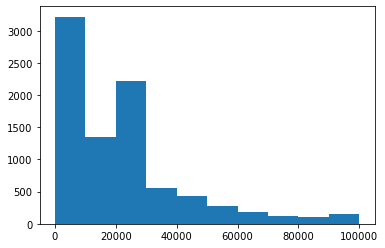

In [56]:
#Plot a histogram for Size as well.
plt.hist(inp1.Size)
plt.show()

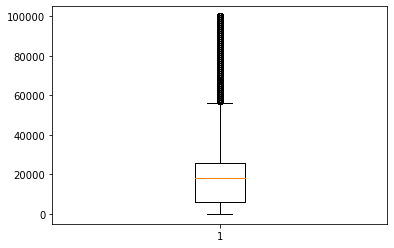

In [57]:
#Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Size)
plt.show()

In [58]:
inp1.Size.describe()

count      8624.000000
mean      21634.926354
std       20668.248638
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

In [59]:
#import the necessary libraries
import seaborn as sns


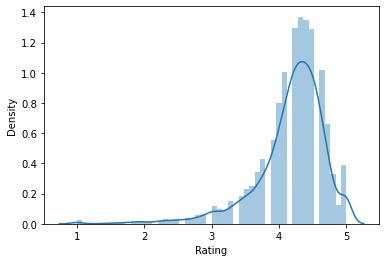

In [60]:
#Create a distribution plot for rating
sns.distplot(inp1.Rating)
plt.show()


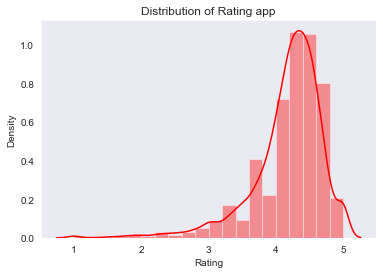

In [61]:
sns.set_style('dark')
sns.distplot(inp1.Rating,bins = 20, color = 'r')
plt.title('Distribution of Rating app', fontsize = 12)
plt.show()


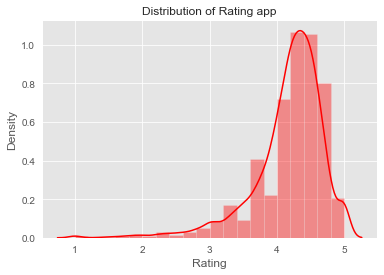

In [62]:
#Apply matplotlib functionalities

plt.style.use('ggplot')
sns.distplot(inp1.Rating,bins = 20, color = 'r')
plt.title('Distribution of Rating app', fontsize = 12)
plt.show()


In [63]:
plt.style.use('default')
%matplotlib inline


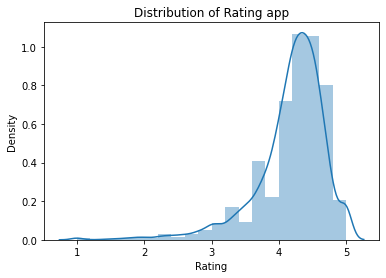

In [64]:
sns.distplot(inp1.Rating,bins = 20)
plt.title('Distribution of Rating app', fontsize = 12)
plt.show()

In [65]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [66]:
#Remove the rows with values which are less represented 
inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+','Unrated'])]

In [67]:
inp1.shape

(8620, 13)

In [68]:
#Reset the index
inp1.reset_index(inplace=True,drop=True)

In [69]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int64  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 841.9+ KB


In [70]:
#Check the apps belonging to different categories of Content Rating 
inp1['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

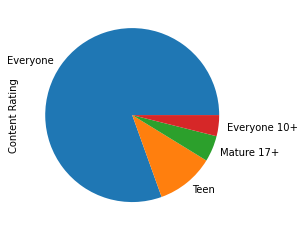

In [71]:
#Plot a pie chart
inp1['Content Rating'].value_counts().plot.pie()
plt.show()


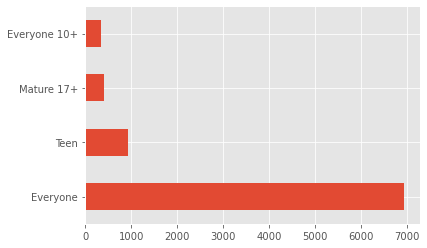

In [72]:
#Plot a bar chart
plt.style.use('ggplot')
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

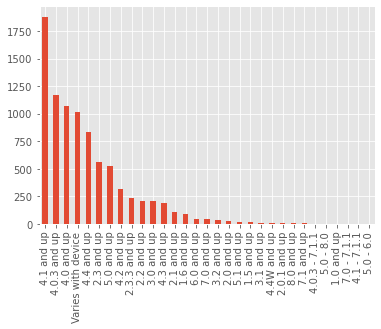

In [73]:
#bar plot for checking the 4th highest Android version type
plt.style.use('ggplot')
#plt.figsize(20,5)
inp1['Android Ver'].value_counts().plot.bar()
plt.show()

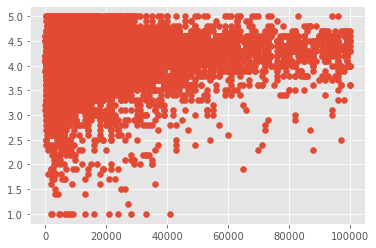

In [74]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size,inp1.Rating)
plt.show()

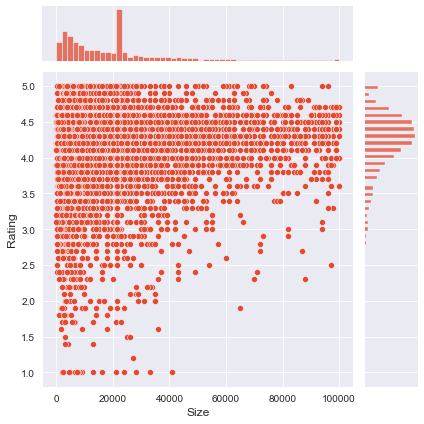

In [75]:
### Plot the same thing using a jointplot
sns.set_style('darkgrid')
sns.jointplot(inp1.Size,inp1.Rating)

The major insight that you got from the scatter plot is that there is a very weak trend between size and ratings, 
i.e. you cannot strongly say that higher size means better ratings. 

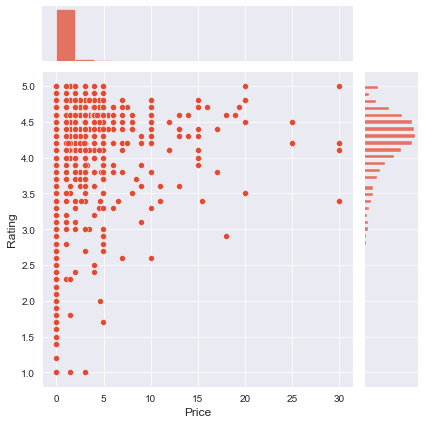

In [76]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp1.Price,inp1.Rating)
plt.show()


**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

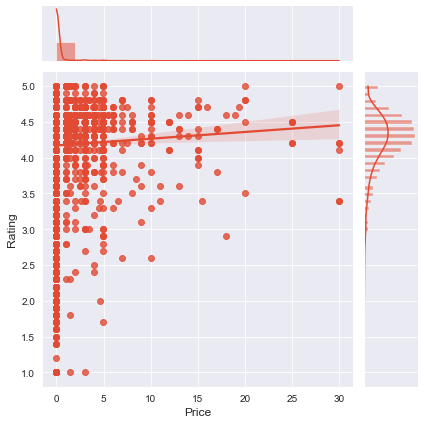

In [77]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp1.Price,inp1.Rating,kind='reg')
plt.show()



The line seem to have a positive slope, hintting that as the price increases the Rating also increases. 

In [78]:
##reg plot for Price and Rating again for only the paid apps.
#inp1[inp1['Type'].isin(['Free'])]
#inp1['Type'].value_counts()
Paid = inp1[inp1['Type'].isin(['Paid'])]
Paid.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
218,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
219,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
274,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
275,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
367,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


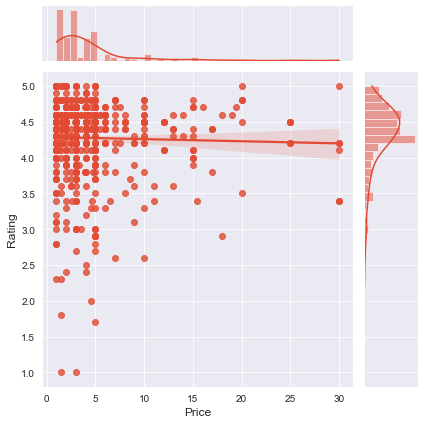

In [79]:
sns.jointplot(Paid.Price,Paid.Rating,kind = 'reg')
plt.show()


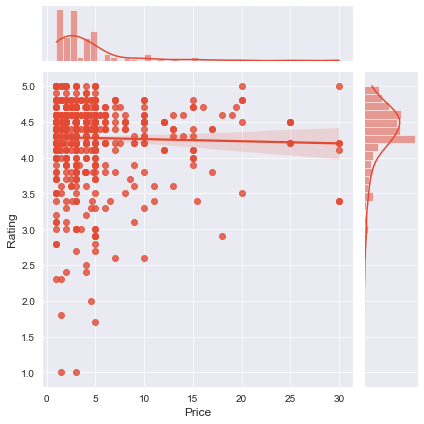

In [80]:
sns.jointplot('Price','Rating',data=inp1[inp1.Price>0],kind= 'reg')
plt.show()

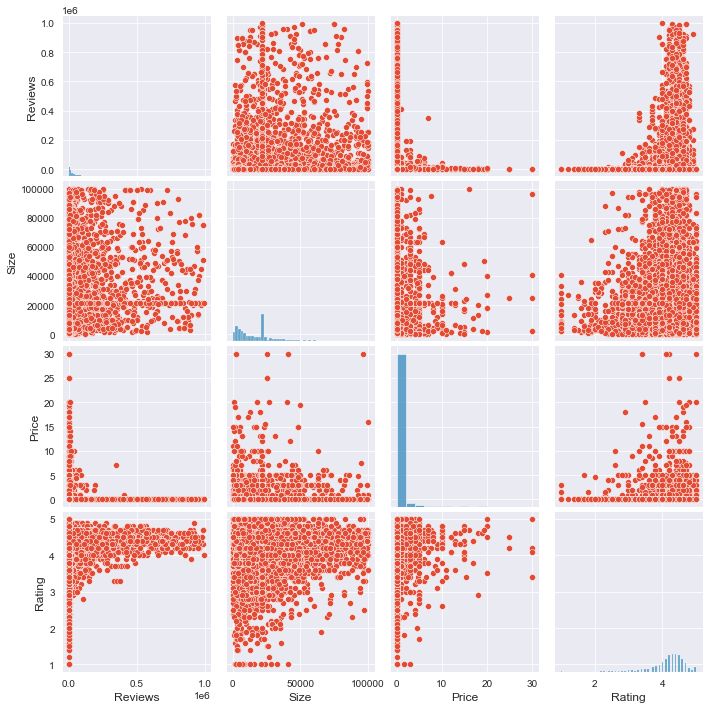

In [81]:
##pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[["Reviews", "Size", "Price","Rating"]])
plt.show()

Reviews and Price have an inverse relationship as the L-shaped scatter plot represents.

### Bar Plot

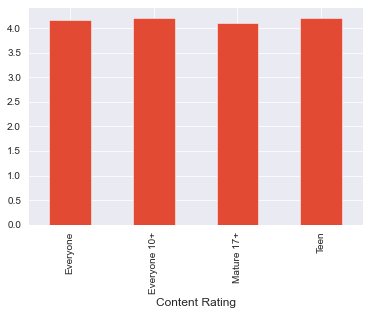

In [82]:
##bar plot of Content Rating vs Average Rating 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()


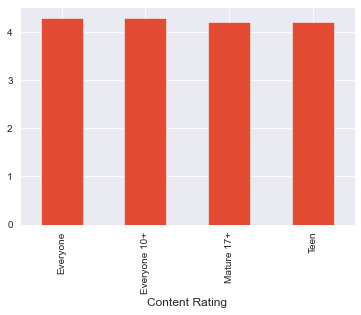

In [83]:
##bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

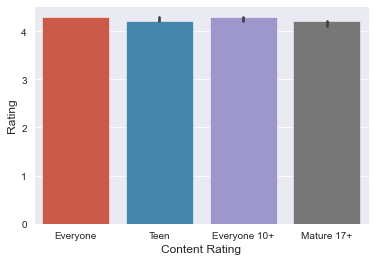

In [84]:
##above bar plot using the estimator parameter
sns.barplot(data=inp1,x='Content Rating',y='Rating',estimator=np.median)
plt.show()


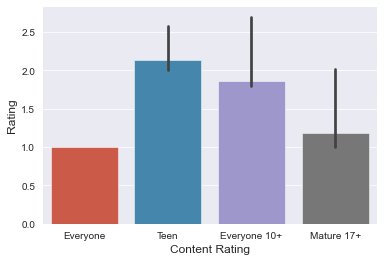

In [85]:
##bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1,x='Content Rating',y='Rating',estimator= lambda x : np.percentile(x,0.05))
plt.show()

Here, you can see some clear differences popping up: “Teen” has the highest rating at the 5th percentile (2.2), followed by 
“Everyone 10+” (around 1.8) and then “Mature 17”(around 1.2) & “Everyone”(around 1).

Using the estimator function, you can observe the values at different percentiles and compare the different categories. 

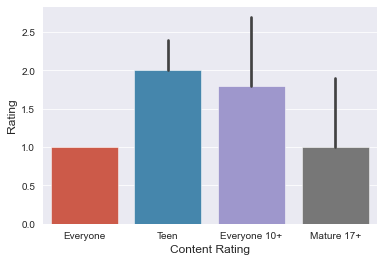

In [86]:
##bar plot with the minimum Rating
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator = np.min)
plt.show()

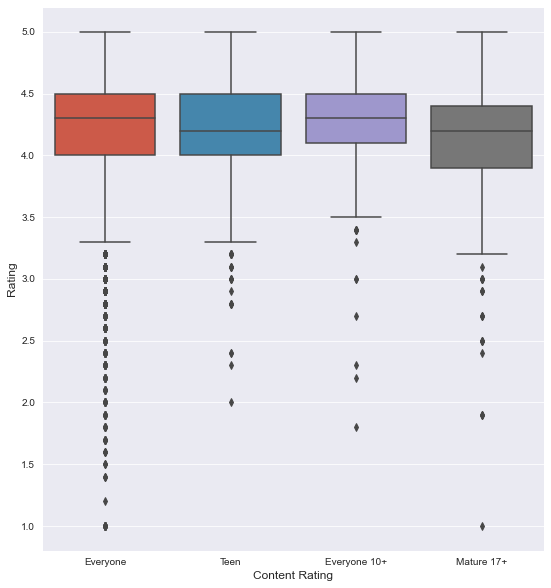

In [87]:
##box plot of Rating vs Content Rating
plt.figure(figsize=[9,10])
sns.boxplot(inp1['Content Rating'],inp1['Rating'])
plt.show()

That “Everyone” category has the highest number of ratings in the lower percentiles as compared to the other categories.
The median values are all comparable, which was discovered in the previous views as well.
The upper fences for all the categories get capped at 5.0, whereas there are some observable differences in the lower fences.

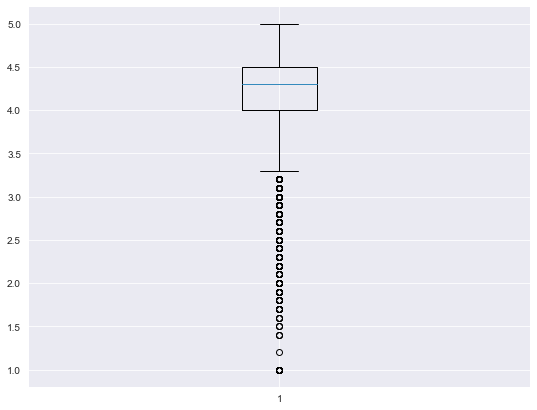

In [88]:
##box plot for the Rating column only
plt.figure(figsize=[9,7])
plt.boxplot(inp1.Rating)
plt.show()

You’ll observe that the lower fence is between 3.0 -3.5

In [89]:
#Check the value counts for column genres
inp1.Genres.value_counts()

Tools                     694
Entertainment             508
Education                 464
Medical                   344
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 115, dtype: int64

In [90]:
#Filtering the 4 most popular Genres
inp1 = inp1[inp1['Genres'].isin(['Tools','Entertainment','Education','Medical'])]
inp1.Genres.value_counts()

Tools            694
Entertainment    508
Education        464
Medical          344
Name: Genres, dtype: int64

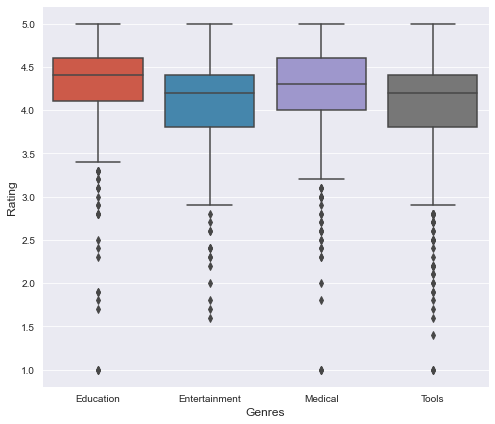

In [91]:
##box plot of Ratings across the 4 most popular Genres
plt.figure(figsize=[8,7])
sns.boxplot(inp1['Genres'],inp1['Rating'])
plt.show()

You can observe that the highest value at lower fence occurs for ‘Education’ Genre.

#### Heat Maps

In [92]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

inp1['Size_bucket'] = pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [93]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_bucket
589,TED,EDUCATION,4.6,181893,18000.0,10000000,Free,0.0,Everyone 10+,Education,"July 27, 2018",3.2.5,4.1 and up,H
590,English Communication - Learn English for Chin...,EDUCATION,4.7,2544,18000.0,100000,Free,0.0,Everyone,Education,"December 29, 2017",3.1,4.0 and up,H
591,Khan Academy,EDUCATION,4.6,85375,21000.0,5000000,Free,0.0,Everyone,Education,"July 27, 2018",5.0.0,4.1 and up,H
592,Learn English with Wlingua,EDUCATION,4.7,314299,3300.0,10000000,Free,0.0,Everyone,Education,"May 2, 2018",1.94.9,4.0 and up,L
594,Learn Spanish - Español,EDUCATION,4.7,32346,3200.0,1000000,Free,0.0,Everyone,Education,"December 18, 2017",1.3.8,4.0 and up,L


In [94]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data = inp1,index='Content Rating',columns='Size_bucket', values= 'Rating')

Size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.034536,4.178042,4.154039,4.188474,4.089333
Everyone 10+,4.133333,4.400000,4.600000,4.413333,3.400000
Mature 17+,4.014286,4.350000,4.354545,4.054545,4.371429
Teen,4.190909,4.215000,4.248837,4.018681,3.968000


In [95]:
##Change the aggregation to median
pd.pivot_table(data = inp1,index='Content Rating',columns='Size_bucket', values= 'Rating',aggfunc= np.median)

Size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.30,4.3,4.3,4.30
Everyone 10+,4.1,4.40,4.6,4.5,3.80
Mature 17+,4.0,4.35,4.4,4.3,4.45
Teen,4.2,4.25,4.3,4.0,4.00


In [96]:
##Change the aggregation to 20th percentile
pd.pivot_table(data = inp1,index='Content Rating',columns='Size_bucket', values= 'Rating',aggfunc= lambda x :np.quantile(x,0.2))


Size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.70,3.90,3.70,3.90,3.7
Everyone 10+,3.98,4.40,4.60,4.28,2.9
Mature 17+,3.66,4.30,3.90,3.70,4.1
Teen,3.80,3.88,3.84,3.80,3.8


In [97]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data = inp1,index='Content Rating',columns='Size_bucket', values= 'Rating',aggfunc= lambda x :np.quantile(x,0.2))


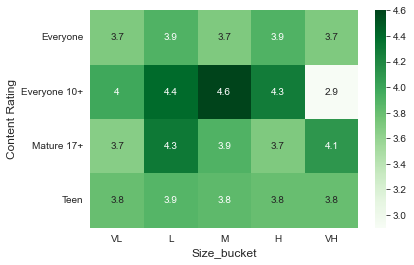

In [98]:
##Apply customisations
sns.heatmap(res,cmap="Greens",annot = True)
plt.show()


In [99]:
##Prepare buckets for the Review column using pd.qcut

inp1['Review_buckets'] = pd.qcut(inp1.Reviews,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [100]:
##Create a pivot table for Size_buckets and Review_buckets with values set to Rating
pd.pivot_table(data = inp1,index='Review_buckets',columns='Size_bucket', values= 'Rating')

Size_bucket,VL,L,M,H,VH
Review_buckets,,,,,
VL,4.039394,4.255556,4.290789,4.018919,4.062651
L,4.000877,4.152041,4.028947,3.983784,3.984211
M,3.978704,4.061039,4.004706,4.027419,3.975714
H,4.132812,4.113433,4.164211,4.202752,4.219403
VH,4.241667,4.350909,4.373810,4.233679,4.269565


In [101]:
##Change the aggregation to median
pd.pivot_table(data = inp1,index='Review_buckets',columns='Size_bucket', values= 'Rating',aggfunc= np.median)

Size_bucket,VL,L,M,H,VH
Review_buckets,,,,,
VL,4.20,4.4,4.5,4.1,4.3
L,4.20,4.2,4.2,4.0,4.2
M,4.10,4.2,4.2,4.2,4.0
H,4.20,4.3,4.2,4.2,4.3
VH,4.35,4.4,4.4,4.3,4.3


In [102]:
##Keep the aggregation at minimum value for Rating
pd.pivot_table(data = inp1,index='Review_buckets',columns='Size_bucket', values= 'Rating',aggfunc= lambda x :np.quantile(x,0.2))


Size_bucket,VL,L,M,H,VH
Review_buckets,,,,,
VL,3.50,3.90,3.7,3.50,3.28
L,3.60,3.84,3.7,3.22,3.60
M,3.60,3.70,3.5,3.70,3.68
H,3.86,3.90,3.8,3.96,4.00
VH,3.96,4.10,4.2,4.00,4.10


In [103]:
##Store the pivot table in a separate variable
res1 = pd.pivot_table(data = inp1,index='Review_buckets',columns='Size_bucket', values= 'Rating',aggfunc= lambda x :np.quantile(x,0.2))


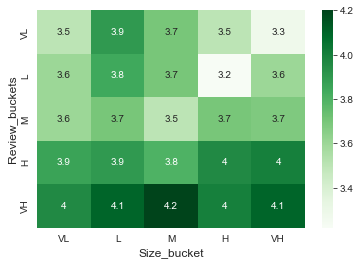

In [104]:
##Apply customisations
sns.heatmap(res1,cmap="Greens",annot = True)
plt.show()


#### Line Plots

In [105]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_bucket       category
Review_buckets    category
dtype: object

In [106]:
inp1['Last Updated'].head()

589        July 27, 2018
590    December 29, 2017
591        July 27, 2018
592          May 2, 2018
594    December 18, 2017
Name: Last Updated, dtype: object

In [107]:
## Extract the month from the Last Updated Date
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month


In [108]:
## Find the average Rating across all the months
inp1.groupby(['updated_month'])['Rating'].mean()


updated_month
1     4.205310
2     4.089796
3     4.034286
4     4.062097
5     4.107000
6     4.164167
7     4.179885
8     4.247222
9     4.055696
10    3.951064
11    4.203297
12    3.884946
Name: Rating, dtype: float64

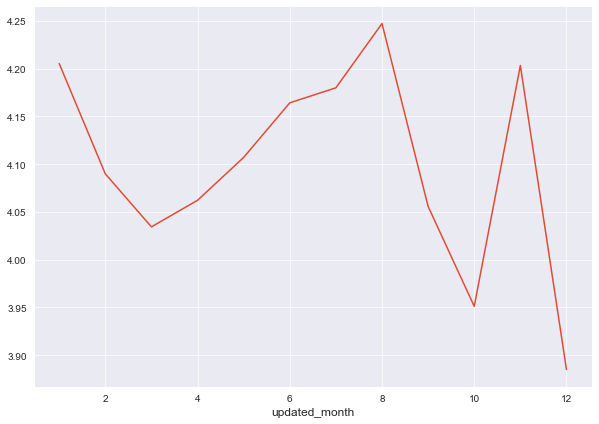

In [109]:
## Plot a line graph
plt.figure(figsize=[10,7])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()


#### Stacked Bar Charts

In [110]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data = inp1,values = 'Installs',index = 'updated_month',columns ='Content Rating', aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,1.236339e+08,51000.0,1100110.0,25116000.0
2,1.142279e+08,100000.0,NaN,320000.0
3,1.094249e+08,10500.0,51100.0,30415100.0
4,2.010693e+08,NaN,251000.0,31025000.0
5,1.890142e+08,1000.0,1050000.0,18751000.0
6,3.790798e+08,NaN,63201700.0,24265900.0
7,1.398620e+09,53100000.0,2510000.0,633672100.0
8,5.752863e+08,40000000.0,21200000.0,164262100.0
9,3.456266e+07,1521100.0,1201000.0,1116000.0


In [111]:
##Store the table in a separate variable
monthly = pd.pivot_table(data = inp1,values = 'Installs',index = 'updated_month',columns ='Content Rating', aggfunc=sum)

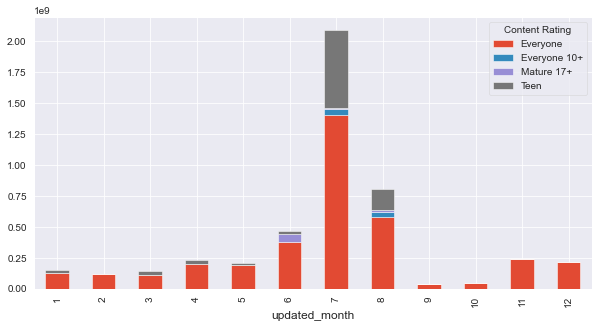

In [112]:
##Plot the stacked bar chart.
monthly.plot(kind = "bar",stacked = True,figsize =[10,5])
plt.show()

Here, even though you can say that the months June-Aug has the highest number of installs, it is quite difficult to infer anything about the different Content Rating categories. 
To overcome this, you set all of the different types( Content Rating)of installs in proportion to their monthly installs.

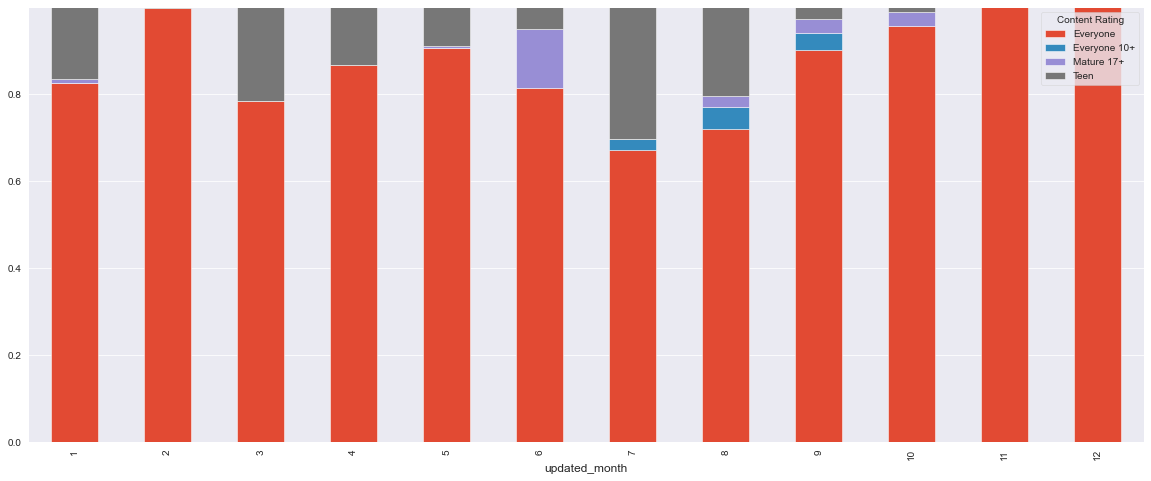

In [113]:
##Plot the stacked bar chart again wrt to the proportions.
monthly_perc = monthly[['Everyone','Everyone 10+','Mature 17+','Teen']].apply(lambda x :x/x.sum(),axis=1)
monthly_perc.plot(kind = "bar",stacked = True,figsize =[20,8])
plt.show()